# import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [9]:
# define path

path = r'/Users/alisoncoolidge/Desktop/Happiness Project'

In [10]:
# create dataframe

df = pd.read_csv(os.path.join(path, 'Datasets', 'happiness_data_clean_v2.csv'))

In [11]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Country name,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,0,0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,1,1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,2,2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,3,3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,4,4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       2089 non-null   int64  
 1   Unnamed: 0                         2089 non-null   int64  
 2   Country name                       2089 non-null   object 
 3   year                               2089 non-null   int64  
 4   Life Ladder                        2089 non-null   float64
 5   GDP per capita                     2062 non-null   float64
 6   Social support                     2076 non-null   float64
 7   Healthy life expectancy at birth   2031 non-null   float64
 8   Freedom to make life choices       2057 non-null   float64
 9   Generosity                         2009 non-null   float64
 10  Perceptions of corruption          1976 non-null   float64
 11  Positive affect                    2065 non-null   float

# data cleaning

In [21]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [17]:
# drop extra columns

df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [18]:
# fixing year

df['year'] = df['year'].astype('object')

In [19]:
df.dtypes

Country name                          object
year                                  object
Life Ladder                          float64
GDP per capita                       float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
dtype: object

In [20]:
# exporting cleaned df for future use

df.to_csv(os.path.join(path, 'Datasets', 'happiness_data_clean_v3.csv'))

In [22]:
# check for missing values

df.isnull().sum() 

Country name                           0
year                                   0
Life Ladder                            0
GDP per capita                        27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

In [39]:
# removing missing values from GDP per capita

df_2 = df.dropna(subset = ['GDP per capita'])

In [40]:
df_2.isnull().sum() 

Country name                           0
year                                   0
Life Ladder                            0
GDP per capita                         0
Social support                        13
Healthy life expectancy at birth      42
Freedom to make life choices          32
Generosity                            53
Perceptions of corruption            112
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

In [41]:
# check for dupes

dupes = df_2.duplicated()

In [42]:
dupes.shape # No dupes

(2062,)

/Users/alisoncoolidge/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP per capita', ylabel='Density'>

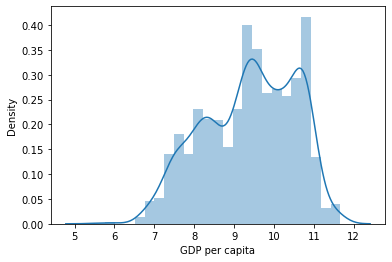

In [43]:
# check for extreme values

sns.distplot(df_2['GDP per capita'], bins=25)

In [44]:
# Check the mean

df_2['GDP per capita'].mean() 

9.37840846511202

In [45]:
# Check the median

df_2['GDP per capita'].median() 

9.4632687565

In [46]:
# Check the max

df_2['GDP per capita'].max() 

11.66580296

# visual exploration of GDP per capita (spending power) and Life Ladder (personal ranking of happiness on 1-10 scale)

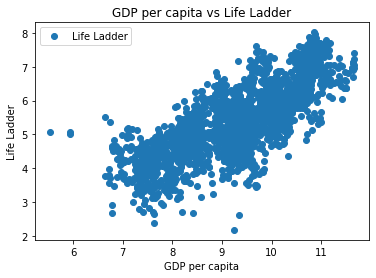

In [47]:
# Create a scatterplot of GDP per capita and Life Ladder

df_2.plot(x = 'GDP per capita', y='Life Ladder',style='o')
plt.title('GDP per capita vs Life Ladder')  
plt.xlabel('GDP per capita')  
plt.ylabel('Life Ladder')  
plt.show()

# HYPOTHESIS: If people have a higher GDP per capita (ie personal spelling power) then they will rate themselves as higher on the Life Ladder (ie rate themselves happier on a scale of 1-10). 

In [49]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2['GDP per capita'].values.reshape(-1,1)
y = df_2['Life Ladder'].values.reshape(-1,1)

In [50]:
X

array([[7.30257368],
       [7.47244644],
       [7.57918262],
       ...,
       [8.19699764],
       [8.117733  ],
       [8.15324783]])

In [51]:
y

array([[3.7235899 ],
       [4.40177822],
       [4.75838089],
       ...,
       [2.69352317],
       [3.1598022 ],
       [3.15457821]])

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the data

- First, fit the model you created to the training set.
- Then, create a prediction for y on the test set.

In [53]:
# Create a regression object

regression = LinearRegression()

In [54]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

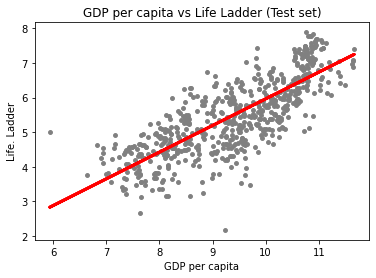

In [56]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Life Ladder (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Life. Ladder')
plot_test.show()

# step 10 - Write your own interpretation of how well the line appears to fit the data in a markdown cell

The line appears to fit the data well. So, personal spending power (GDP per capita) DOES have an impact on how people rate their personal happiness (Life Ladder). Money can't buy happiness, but it can buy things and opportunities that can lead to happiness. 

In [57]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [58]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77034895]]
Mean squared error:  0.4783634491405093
R2 score:  0.5986457210681588


In [59]:
y_predicted

array([[6.0233194 ],
       [6.32178466],
       [6.06823591],
       [6.26266127],
       [5.48400329],
       [6.78654361],
       [6.57822064],
       [4.82909251],
       [6.79201096],
       [5.92180601],
       [4.79996536],
       [5.44584714],
       [3.57770083],
       [3.96226113],
       [6.53141092],
       [4.81101248],
       [4.50867114],
       [4.97399724],
       [6.53936731],
       [5.60056182],
       [6.18185653],
       [5.60894432],
       [5.21643718],
       [5.94880998],
       [4.83667789],
       [5.3186676 ],
       [5.64473264],
       [4.51297259],
       [6.30157337],
       [4.54358669],
       [5.85809171],
       [4.45898375],
       [6.50310292],
       [6.67614742],
       [5.49825353],
       [5.38077005],
       [5.94454674],
       [5.47137739],
       [5.77947994],
       [4.40896024],
       [5.08033516],
       [5.73360324],
       [5.40225377],
       [5.82062615],
       [5.74885408],
       [5.58399005],
       [5.6798943 ],
       [6.261

In [60]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.835483,6.023319
1,6.095473,6.321785
2,5.968871,6.068236
3,5.647690,6.262661
4,5.057561,5.484003
5,6.585246,6.786544
6,6.855329,6.578221
7,5.268375,4.829093
8,7.444262,6.792011
9,5.022758,5.921806


In [61]:
# comparing how the regression fits to the training set

y_predicted_train = regression.predict(X_train)

In [62]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77034895]]
Mean squared error:  0.48421278651902966
R2 score:  0.6166944835558315


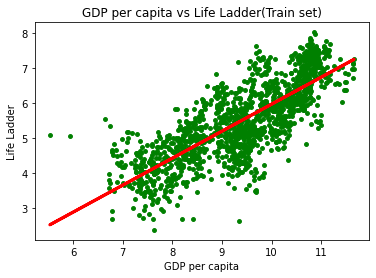

In [64]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Life Ladder(Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Life Ladder')
plot_test.show()

# Include your thoughts on how well the model performed on the test set in a markdown cell.
- Include any reflections you have on the impact of possible data bias.

The model performed fairly well on the test set. The r2 score is 0.61669, so we could call it about 62% accurate. Since happiness is so subjective, and the overall study and dataset includes additional factors such as Life Expectancy, Social Support, various reflections on government and freedom, these results seem logical in predicting the impact of spending power on happiness. 